In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# import model vit_minst
import VisualTransformer

model: tf.keras.Model = tf.keras.models.load_model('./vit_cifar100',
                                               custom_objects={
                                                      'ClassToken': VisualTransformer.ClassToken,
                                                      'AddPositionEmbs': VisualTransformer.AddPositionEmbs,
                                                      'MultiHeadSelfAttention': VisualTransformer.MultiHeadSelfAttention,
                                                      'TransformerBlock': VisualTransformer.TransformerBlock,
                                                      'ViT': VisualTransformer.ViT,
                                                    }
                                                ) # type: ignore

model.summary()

Model: "vit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Conv2D)          multiple                  3136      
                                                                 
 class_token (ClassToken)    multiple                  64        
                                                                 
 Transformer/posembed_input   multiple                 4160      
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   multiple                 25216     
 (TransformerBlock)                                              
                                                                 
 Transformer/encoderblock_1   multiple                 25216     
 (TransformerBlock)                                              
                                                               

# Transform 16x16 patch using dense layer?

In [3]:
model.layers

In [4]:
# output shape
[var.name for var in model.layers[2].variables]

['Transformer/posembed_input/pos_embedding:0']

In [5]:
# check shapes
for var in model.layers[2].variables:
    print(var.name, var.shape)

Transformer/posembed_input/pos_embedding:0 (1, 65, 64)


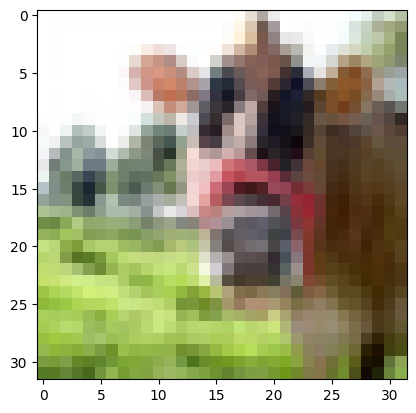

In [6]:
train, test = keras.datasets.cifar100.load_data()

x_train, y_train = train

y_train = y_train.astype("float32")

x_train = x_train / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)

x_test, y_test = test

x_test = x_test / 255.0

x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

y_test = y_test.astype("float32")


import matplotlib.pyplot as plt

sample = x_train[0].reshape(32, 32, 3)

plt.imshow(sample)

(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)


C:\Users\Maciej\AppData\Local\Temp\ipykernel_11056\2251033486.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)
(8, 8, 65, 65)


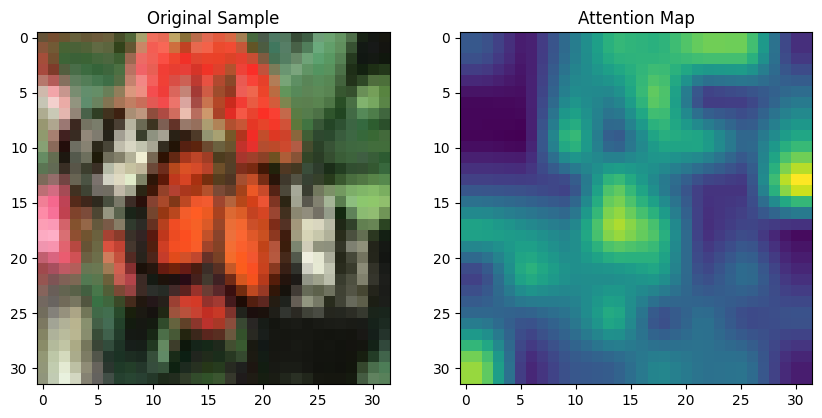

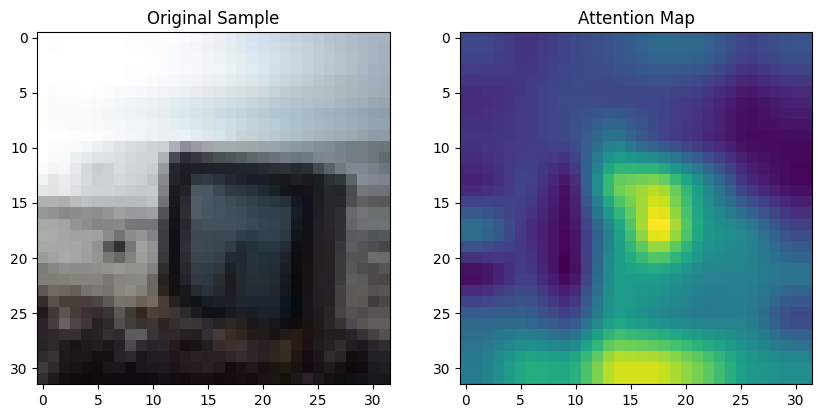

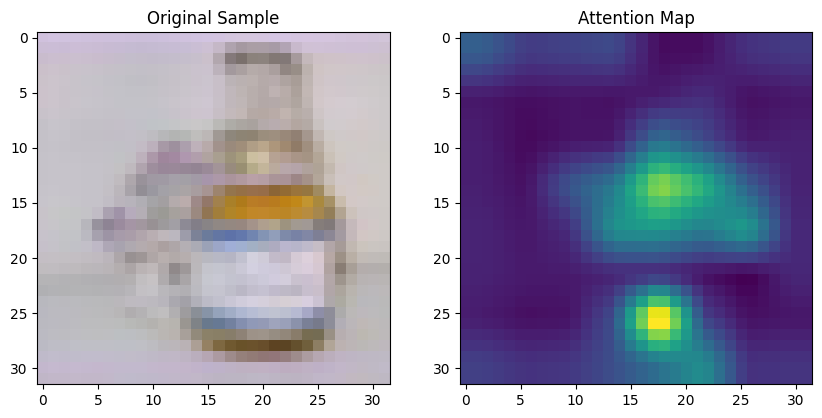

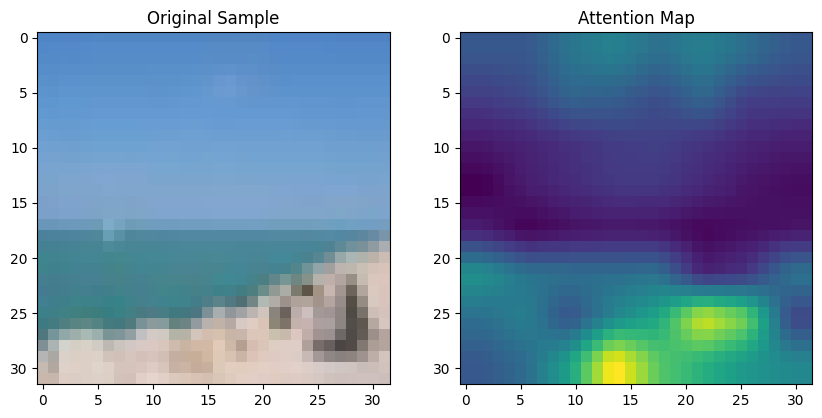

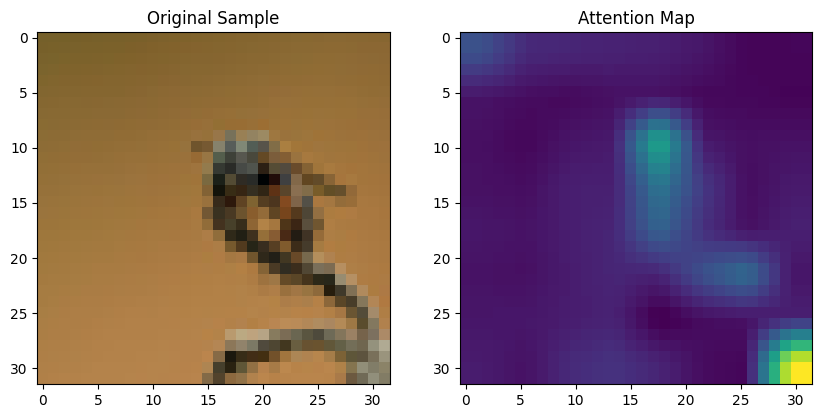

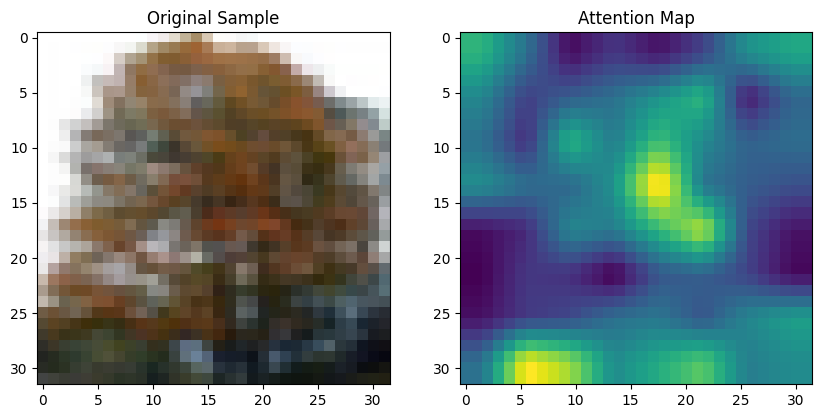

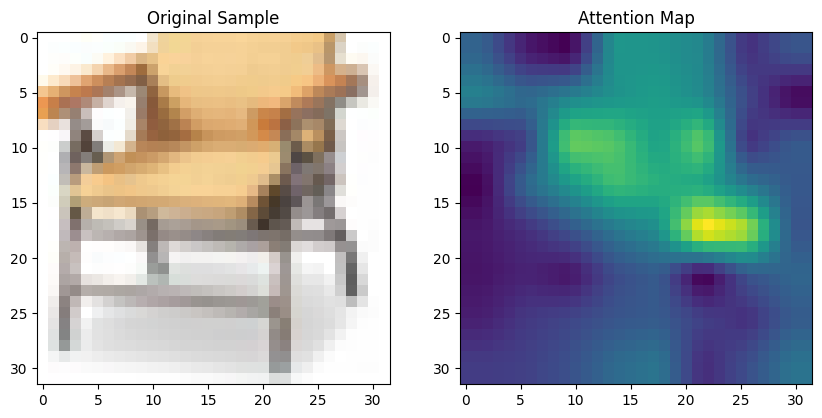

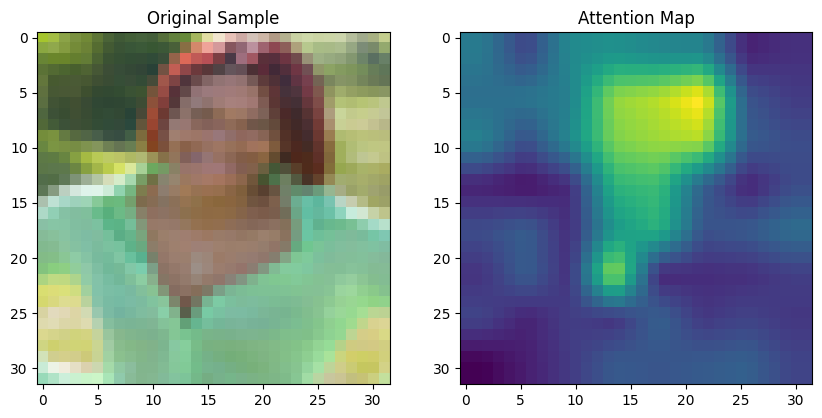

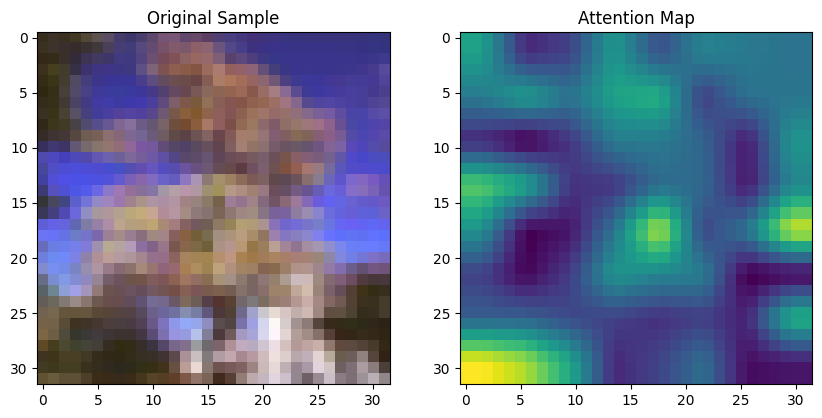

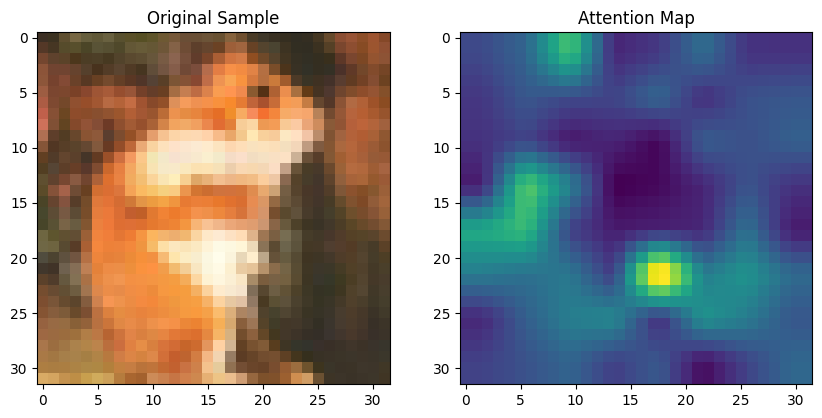

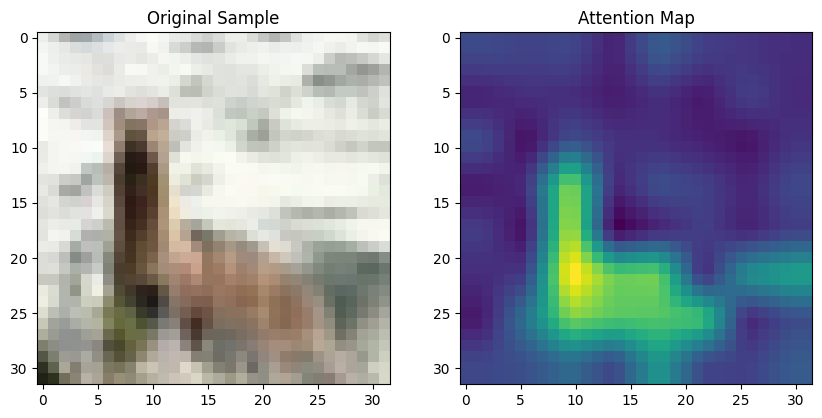

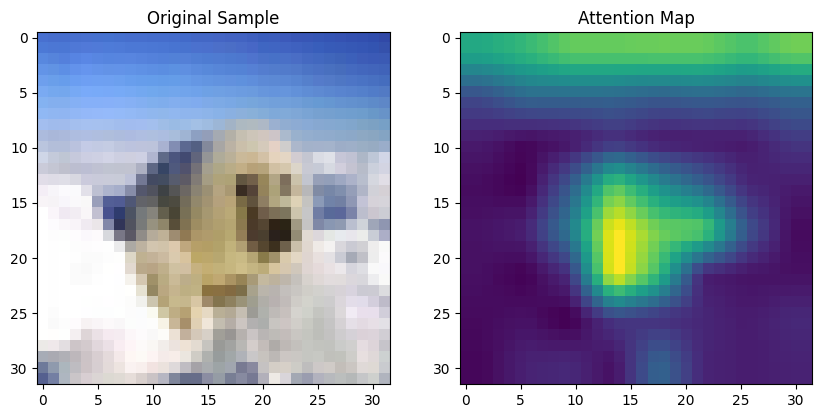

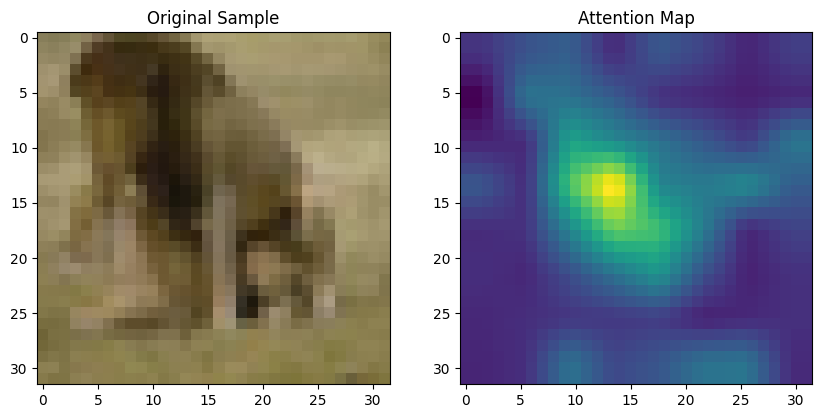

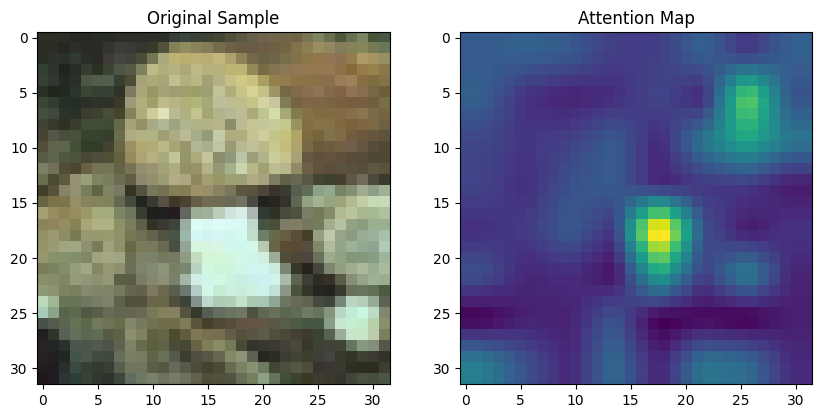

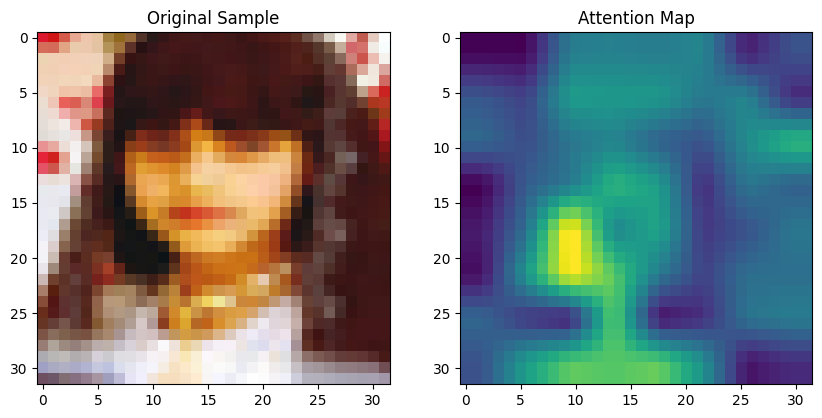

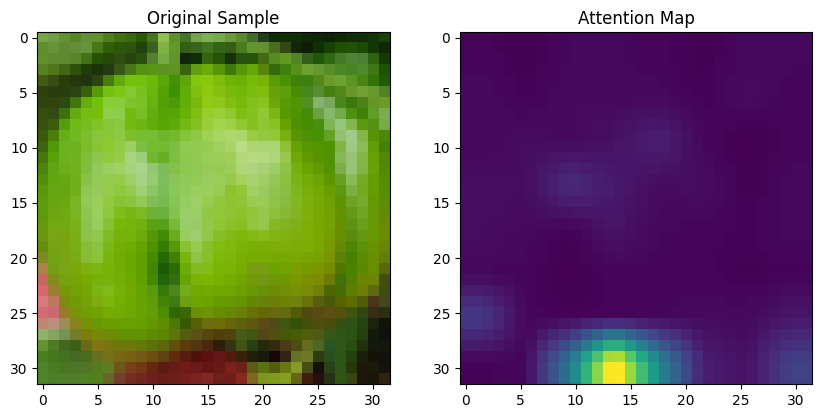

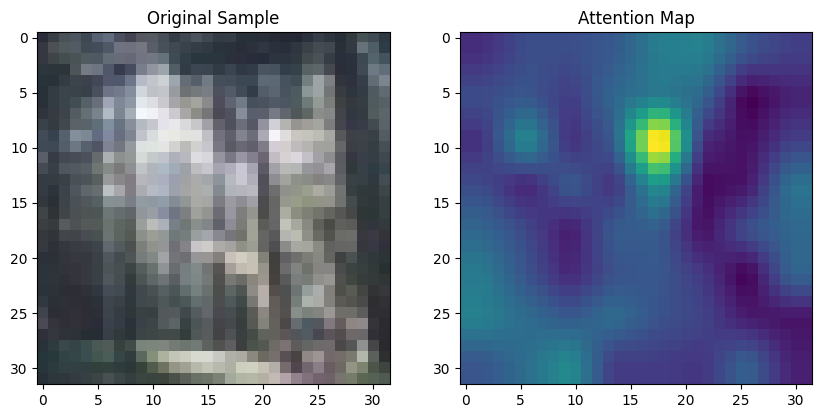

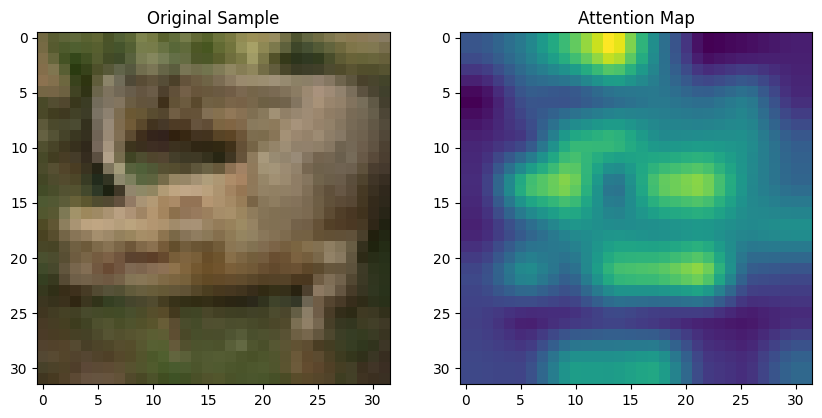

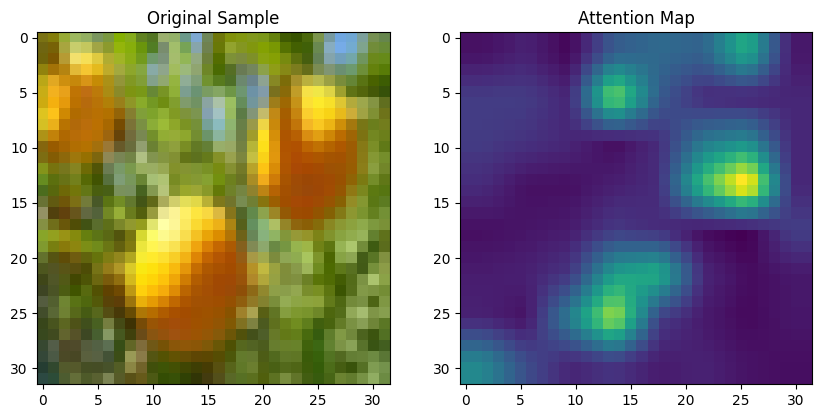

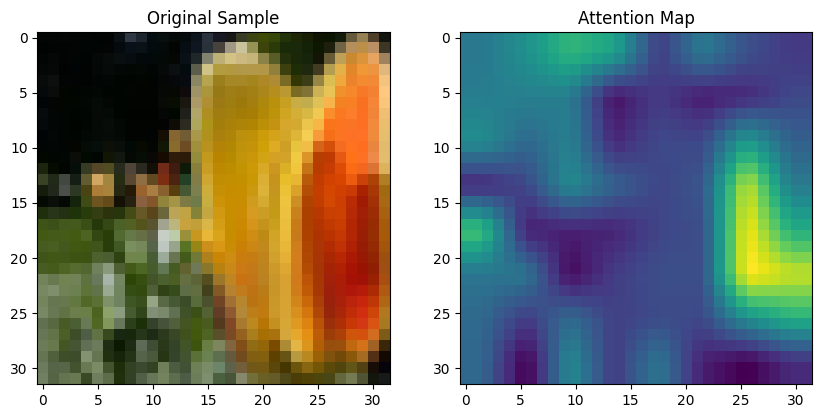

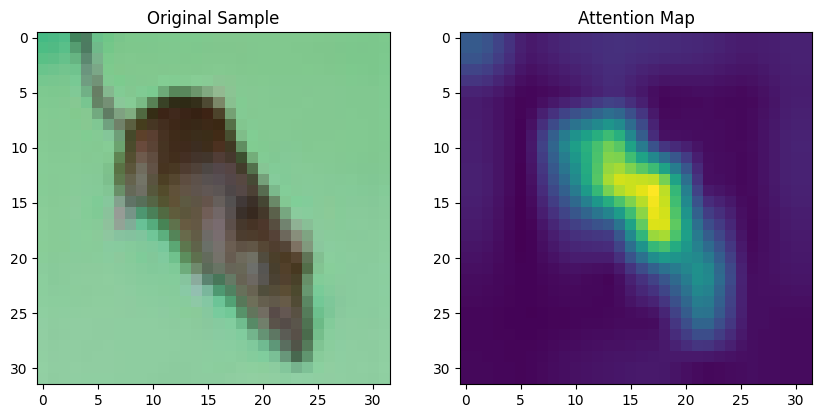

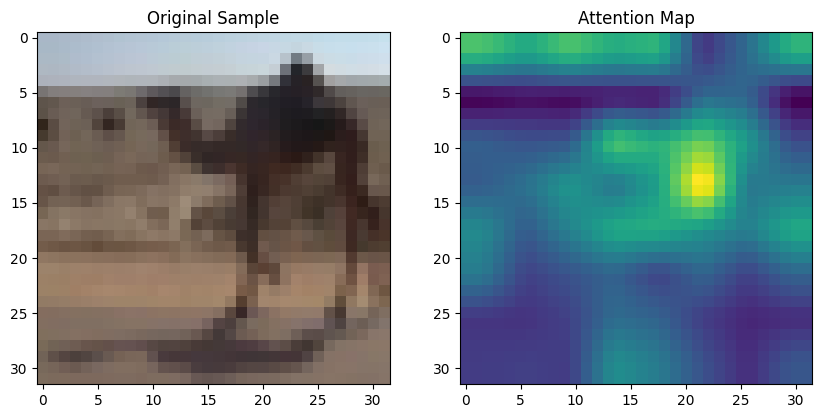

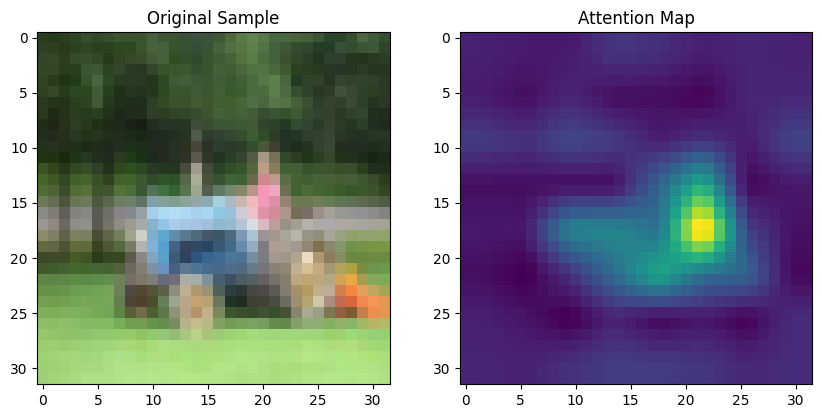

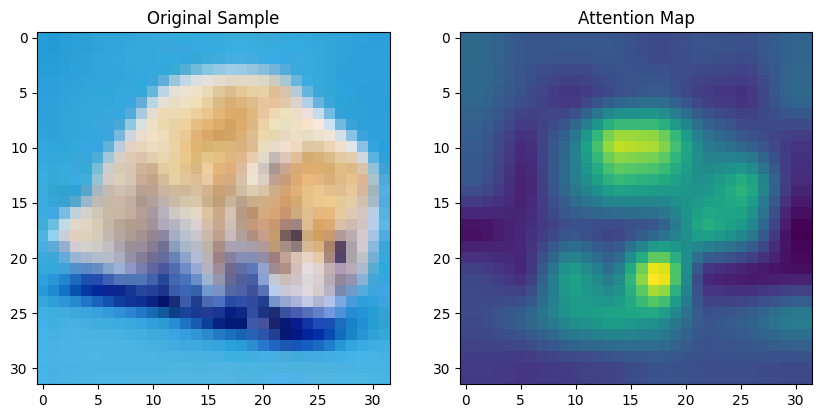

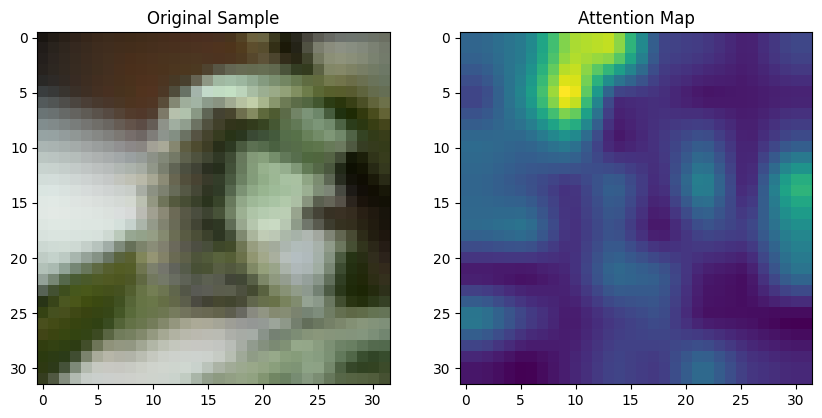

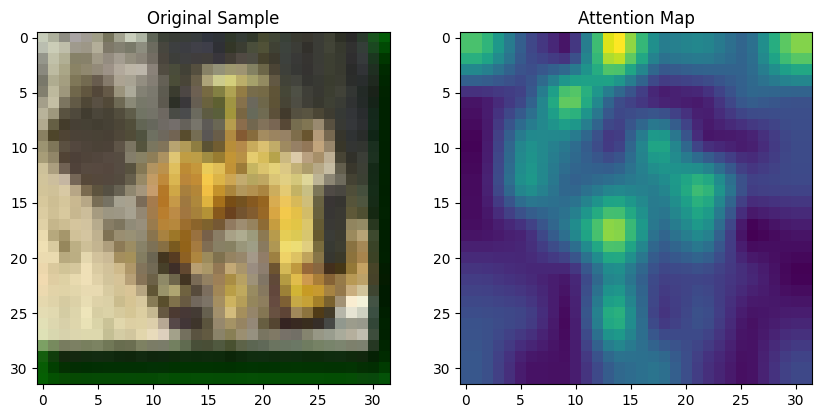

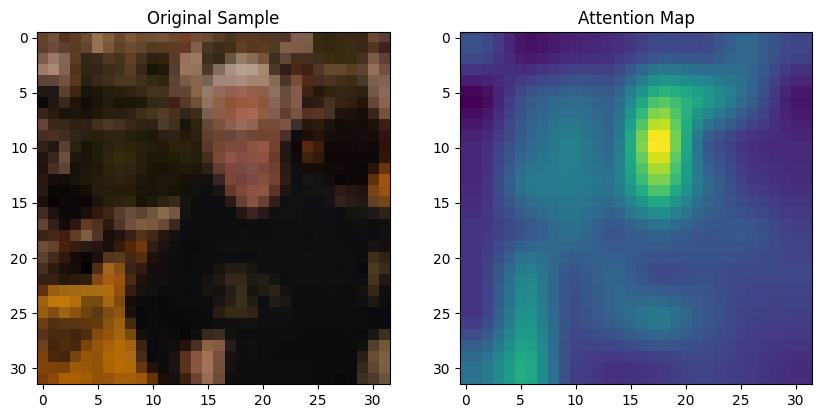

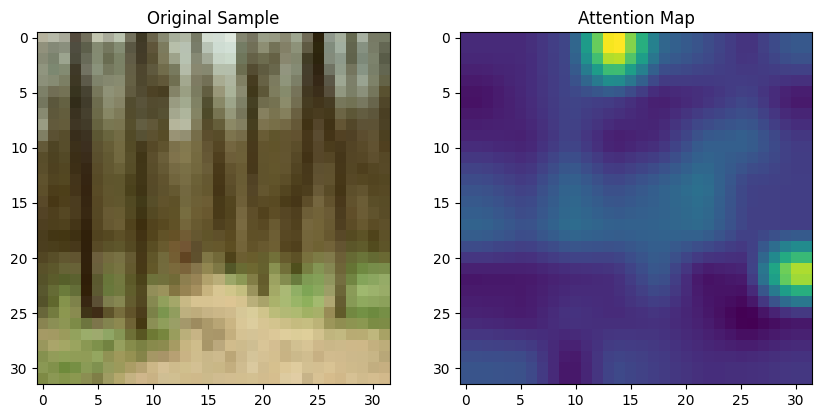

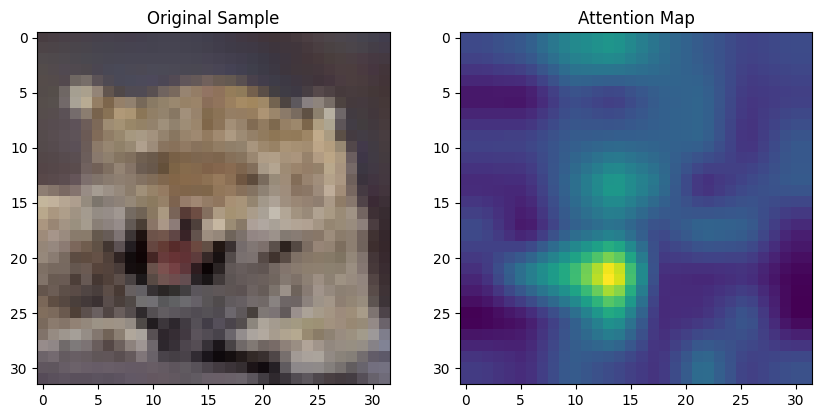

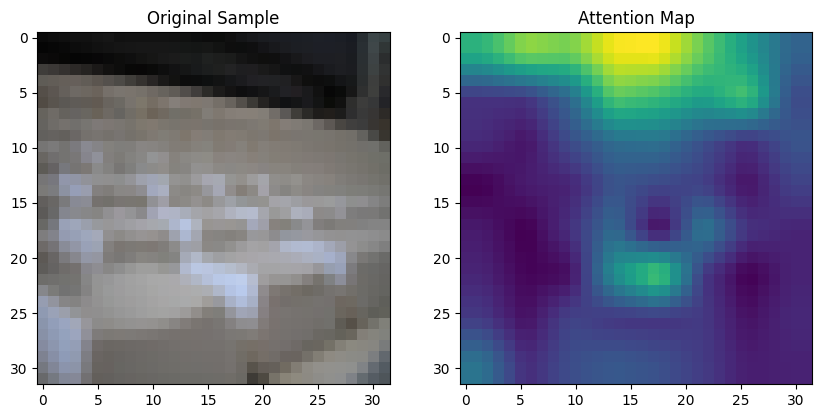

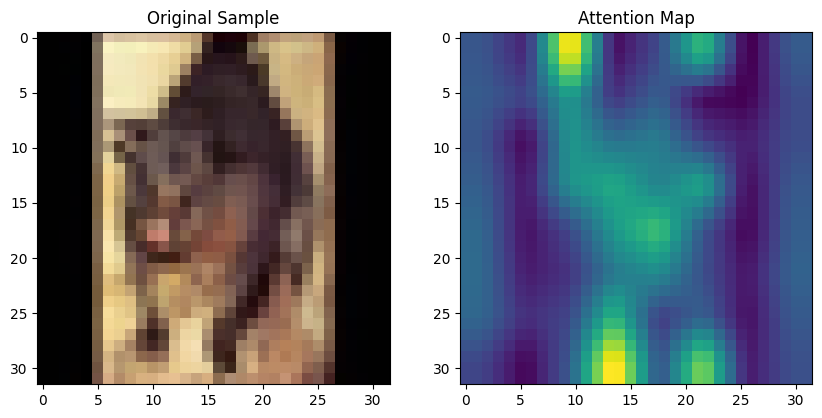

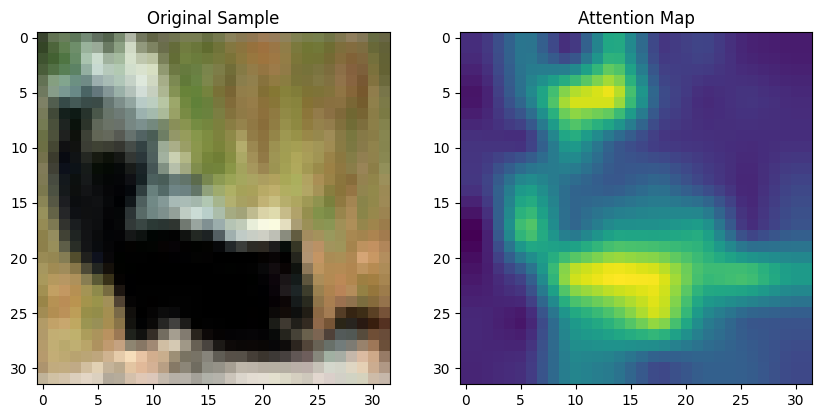

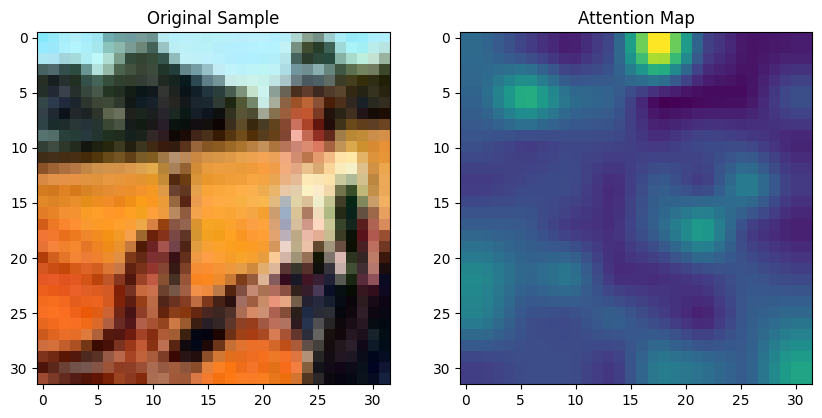

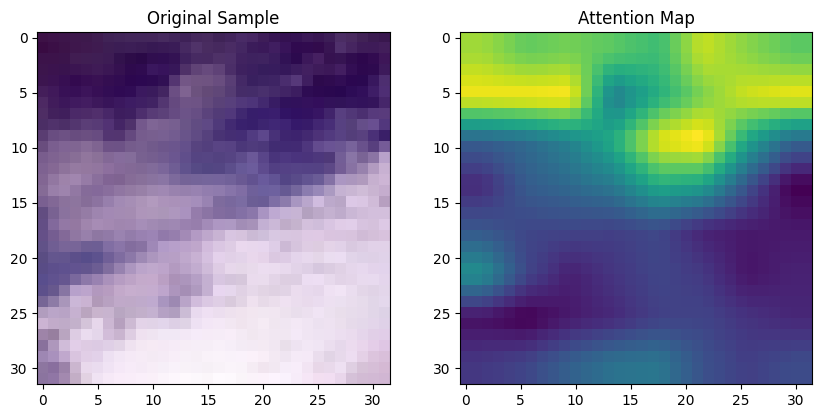

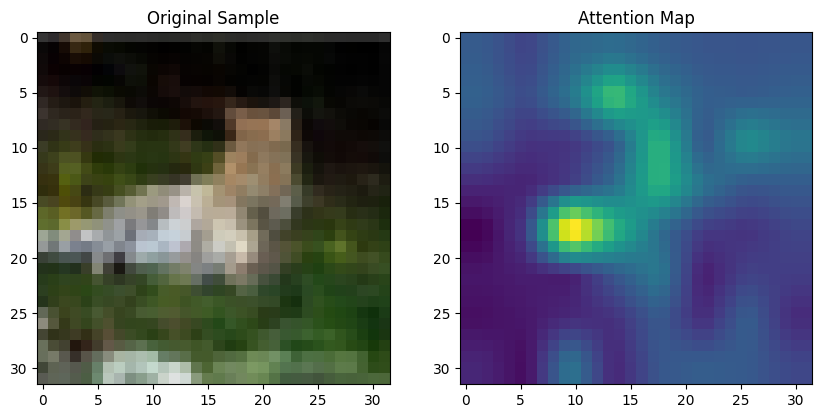

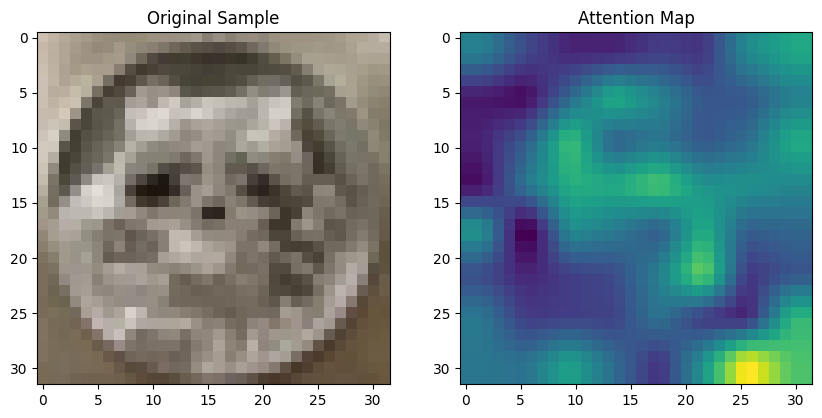

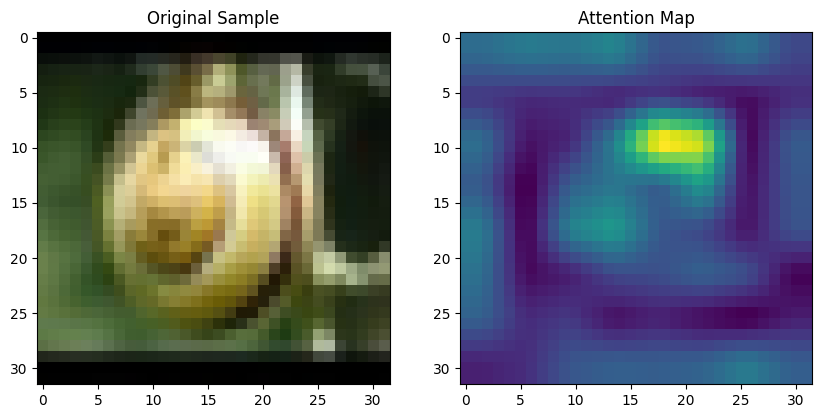

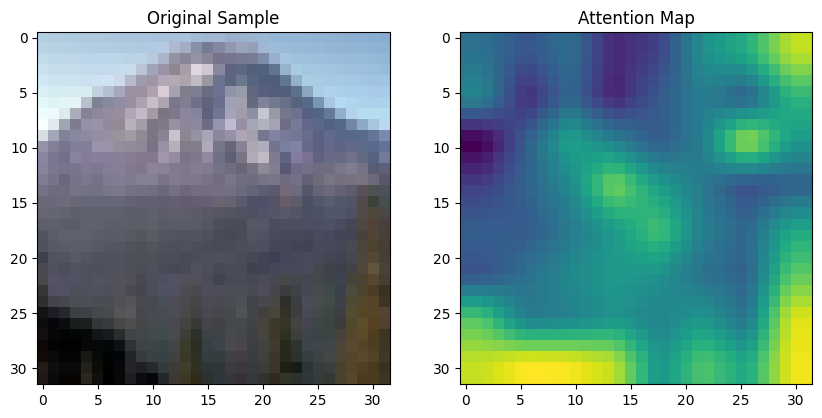

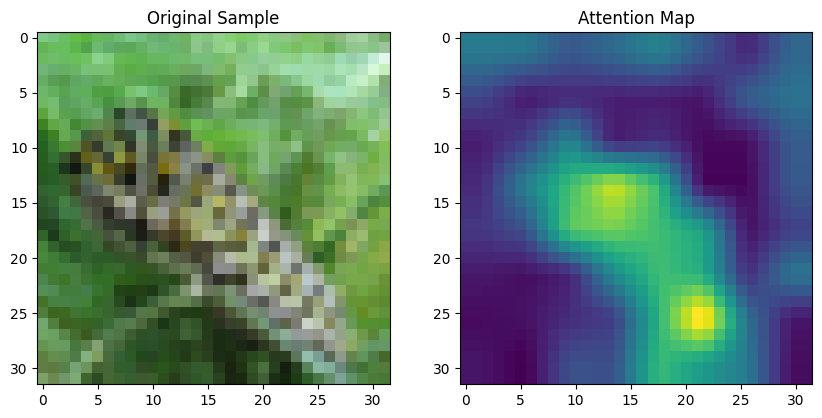

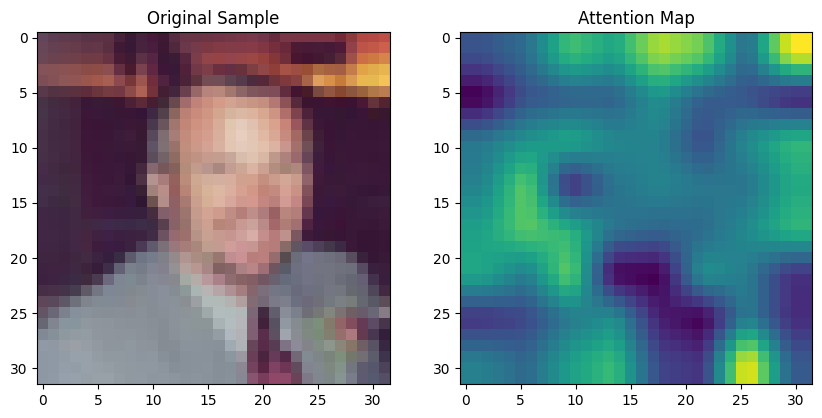

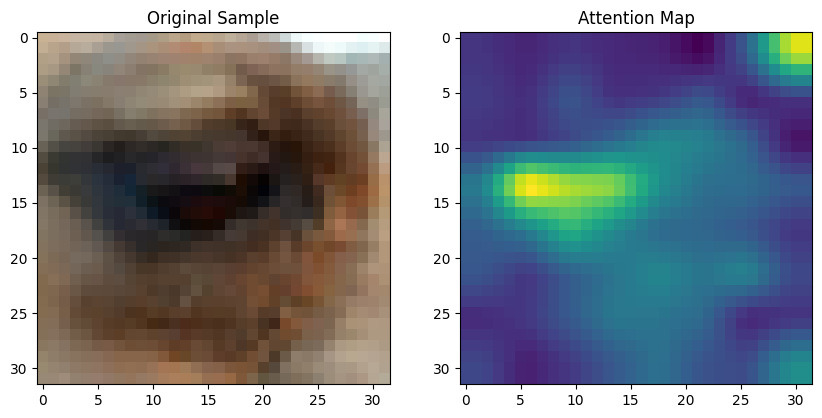

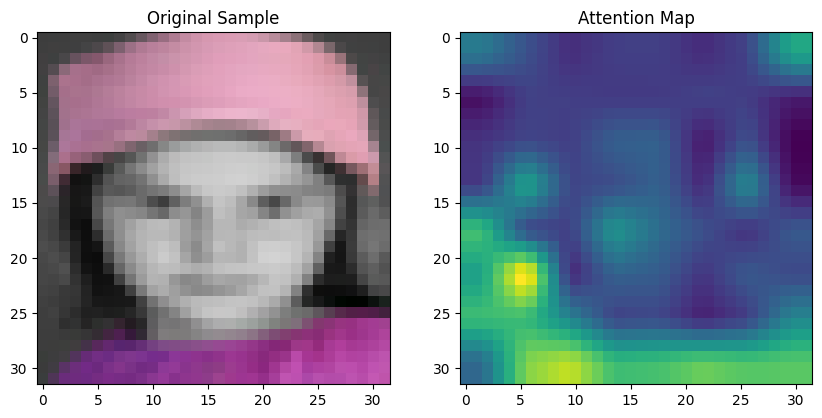

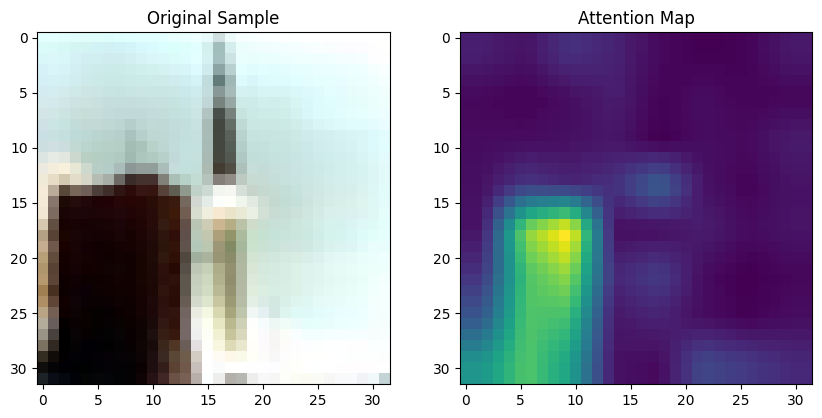

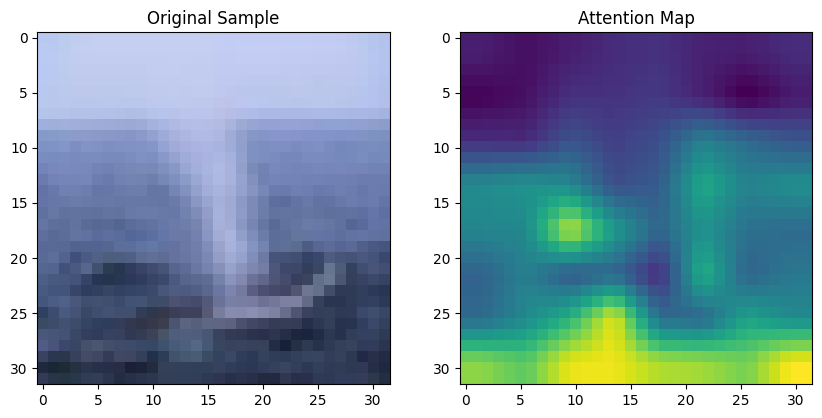

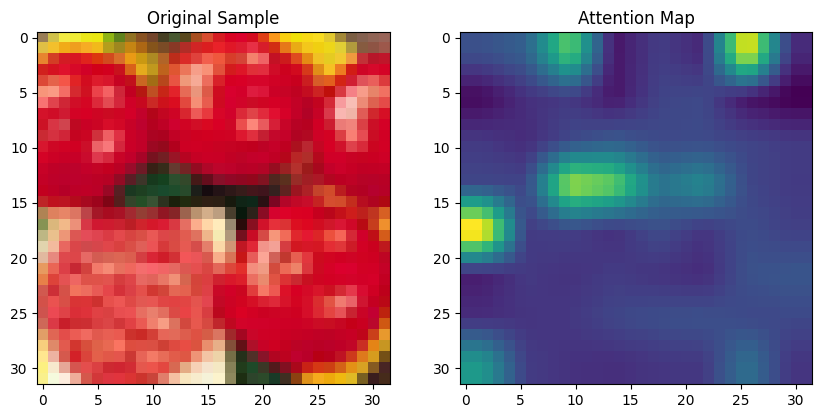

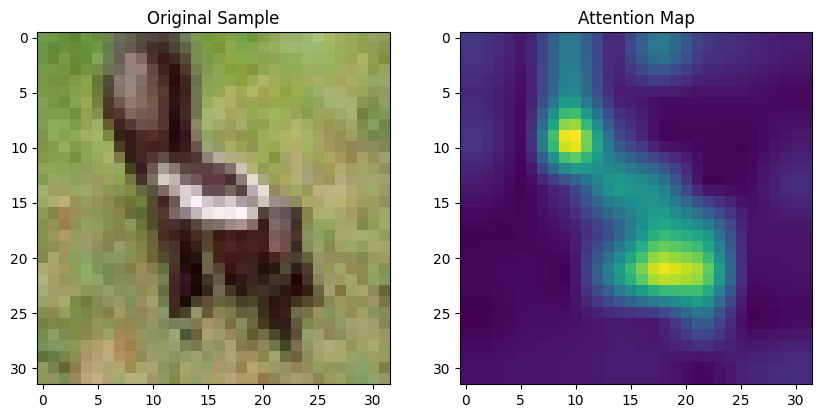

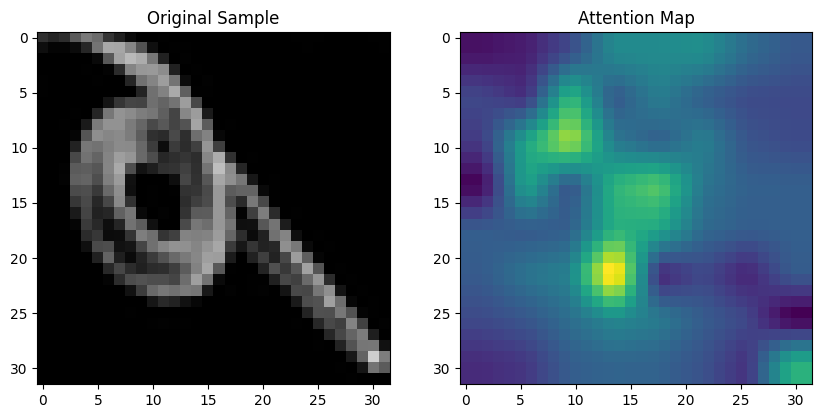

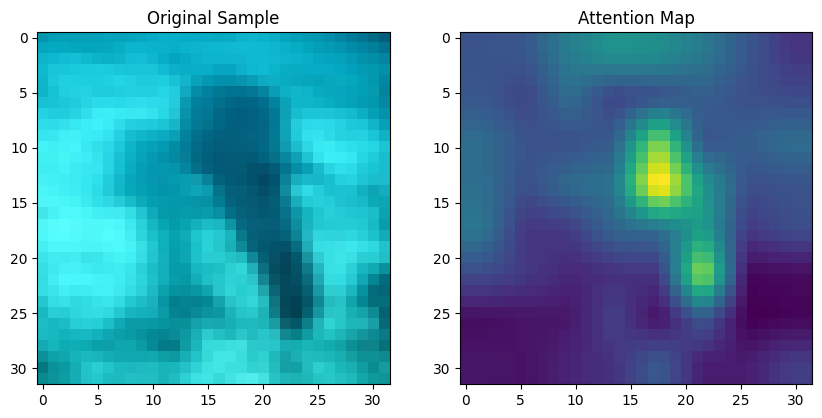

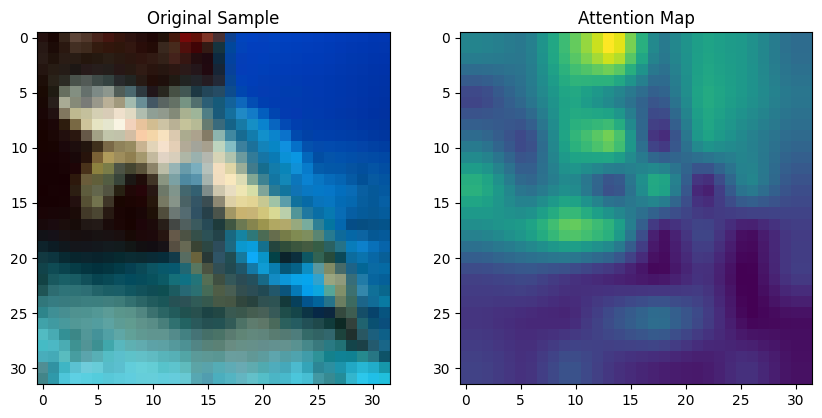

In [7]:
for i in range(51, 100):
    sample = x_train[i].reshape(1, 32, 32, 3)

    plt.figure(figsize=(10, 5))

    # First plot: Original sample
    plt.subplot(1, 2, 1)
    plt.imshow(sample.reshape(32, 32, 3), cmap='gray')
    plt.title('Original Sample')


    sample = sample.reshape(32, 32, 3)

    # Second plot: Attention map
    attentions = VisualTransformer.attention_map(model, sample)
    
    

    plt.subplot(1, 2, 2)
    plt.imshow(attentions, cmap='viridis')
    plt.title('Attention Map')

plt.show()